### Code to create the text embeddings 

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
import tiktoken

tiktoken.encoding_for_model('text-embedding-3-large')

<Encoding 'cl100k_base'>

In [3]:
labels = ['drug induced pigmentary changes', 'photodermatoses',
       'dermatofibroma', 'psoriasis', 'kaposi sarcoma',
       'neutrophilic dermatoses', 'granuloma annulare',
       'nematode infection', 'allergic contact dermatitis',
       'necrobiosis lipoidica', 'hidradenitis', 'melanoma',
       'acne vulgaris', 'sarcoidosis', 'xeroderma pigmentosum',
       'actinic keratosis', 'scleroderma', 'syringoma', 'folliculitis',
       'pityriasis lichenoides chronica', 'porphyria',
       'dyshidrotic eczema', 'seborrheic dermatitis', 'prurigo nodularis',
       'acne', 'neurofibromatosis', 'eczema', 'pediculosis lids',
       'basal cell carcinoma', 'pityriasis rubra pilaris',
       'pityriasis rosea', 'livedo reticularis',
       'stevens johnson syndrome', 'erythema multiforme',
       'acrodermatitis enteropathica', 'epidermolysis bullosa',
       'dermatomyositis', 'urticaria', 'basal cell carcinoma morpheiform',
       'vitiligo', 'erythema nodosum', 'lupus erythematosus',
       'lichen planus', 'sun damaged skin', 'drug eruption', 'scabies',
       'cheilitis', 'urticaria pigmentosa', 'behcets disease',
       'nevocytic nevus', 'mycosis fungoides',
       'superficial spreading melanoma ssm', 'porokeratosis of mibelli',
       'juvenile xanthogranuloma', 'milia', 'granuloma pyogenic',
       'papilomatosis confluentes and reticulate',
       'neurotic excoriations', 'epidermal nevus', 'naevus comedonicus',
       'erythema annulare centrifigum', 'pilar cyst',
       'pustular psoriasis', 'ichthyosis vulgaris', 'lyme disease',
       'striae', 'rhinophyma', 'calcinosis cutis', 'stasis edema',
       'neurodermatitis', 'congenital nevus', 'squamous cell carcinoma',
       'mucinosis', 'keratosis pilaris', 'keloid', 'tuberous sclerosis',
       'acquired autoimmune bullous diseaseherpes gestationis',
       'fixed eruptions', 'lentigo maligna', 'lichen simplex',
       'dariers disease', 'lymphangioma', 'pilomatricoma',
       'lupus subacute', 'perioral dermatitis',
       'disseminated actinic porokeratosis', 'erythema elevatum diutinum',
       'halo nevus', 'aplasia cutis', 'incontinentia pigmenti',
       'tick bite', 'fordyce spots', 'telangiectases',
       'solid cystic basal cell carcinoma', 'paronychia', 'becker nevus',
       'pyogenic granuloma', 'langerhans cell histiocytosis',
       'port wine stain', 'malignant melanoma', 'factitial dermatitis',
       'xanthomas', 'nevus sebaceous of jadassohn',
       'hailey hailey disease', 'scleromyxedema', 'porokeratosis actinic',
       'rosacea', 'acanthosis nigricans', 'myiasis',
       'seborrheic keratosis', 'mucous cyst', 'lichen amyloidosis',
       'ehlers danlos syndrome', 'tungiasis','eudermic']

In [6]:
import os

# get openai api key from platform.openai.com
OPENAI_API_KEY = ''

In [7]:
from langchain.embeddings.openai import OpenAIEmbeddings

model_name1 = 'text-embedding-3-large'

embed1 = OpenAIEmbeddings(
    model=model_name1,
    openai_api_key=OPENAI_API_KEY
)

In [11]:
df=pd.read_csv('fitzpatrick17k.csv')
df.shape

(16577, 9)

In [12]:
df

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
...,...,...,...,...,...,...,...,...,...
16572,cd90e491ddaa92f0f4eb07f73aa09f64,5,5,scleroderma,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4529,httpwwwatlasdermatologicocombrimgimageId4529.jpg
16573,5f1ed6de6a9110d7dc580a6a0312af63,4,5,pityriasis rosea,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5630,httpwwwatlasdermatologicocombrimgimageId5630.jpg
16574,f198aaf1f0550c2464b285454d34926e,3,3,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4609,httpwwwatlasdermatologicocombrimgimageId4609.jpg
16575,6214de2e915835014235a1839cbc5938,-1,5,vitiligo,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=7930,httpwwwatlasdermatologicocombrimgimageId7930.jpg


In [13]:
three_label_map={}
column1='label'
column2='three_partition_label'

In [15]:
unique_classes = df.groupby(column1)[column2].unique()
unique_classes

label
acanthosis nigricans                                     [non-neoplastic]
acne                                                     [non-neoplastic]
acne vulgaris                                            [non-neoplastic]
acquired autoimmune bullous diseaseherpes gestationis    [non-neoplastic]
acrodermatitis enteropathica                             [non-neoplastic]
                                                               ...       
urticaria                                                [non-neoplastic]
urticaria pigmentosa                                     [non-neoplastic]
vitiligo                                                 [non-neoplastic]
xanthomas                                                [non-neoplastic]
xeroderma pigmentosum                                    [non-neoplastic]
Name: three_partition_label, Length: 114, dtype: object

In [16]:
for child_class, parent_classes in unique_classes.items():
    if len(parent_classes) > 1:
        # If a child class has more than one parent class, choose the first one arbitrarily
        parent_class = parent_classes[0]
    else:
        parent_class = parent_classes[0]
    three_label_map[child_class] = parent_class

In [17]:
three_label_map['eudermic']='eudermic'

In [18]:
len(three_label_map.keys()), len(three_label_map.values())

(115, 115)

In [19]:
len(np.unique(list(three_label_map.keys())))

115

In [20]:
np.unique(list(three_label_map.values()))

array(['benign', 'eudermic', 'malignant', 'non-neoplastic'], dtype='<U14')

In [21]:
plot_labels=list(three_label_map.values())

In [22]:
k=len(np.unique(list(three_label_map.values())))
colors = plt.cm.get_cmap('tab10', k)

/tmp/ipykernel_1473401/2400629514.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', k)


In [23]:
concatenated_label = []

for key, value in three_label_map.items():
    concatenated_label.append(key + " " +value)
concatenated_label

['acanthosis nigricans non-neoplastic',
 'acne non-neoplastic',
 'acne vulgaris non-neoplastic',
 'acquired autoimmune bullous diseaseherpes gestationis non-neoplastic',
 'acrodermatitis enteropathica non-neoplastic',
 'actinic keratosis malignant',
 'allergic contact dermatitis non-neoplastic',
 'aplasia cutis non-neoplastic',
 'basal cell carcinoma malignant',
 'basal cell carcinoma morpheiform malignant',
 'becker nevus benign',
 'behcets disease non-neoplastic',
 'calcinosis cutis non-neoplastic',
 'cheilitis non-neoplastic',
 'congenital nevus benign',
 'dariers disease non-neoplastic',
 'dermatofibroma benign',
 'dermatomyositis non-neoplastic',
 'disseminated actinic porokeratosis benign',
 'drug eruption non-neoplastic',
 'drug induced pigmentary changes non-neoplastic',
 'dyshidrotic eczema non-neoplastic',
 'eczema non-neoplastic',
 'ehlers danlos syndrome non-neoplastic',
 'epidermal nevus benign',
 'epidermolysis bullosa non-neoplastic',
 'erythema annulare centrifigum non-

In [24]:
#choose either embed or embed1 depending upon the model you want to use

texts = [concatenated_label[i] for i in range(len(concatenated_label))]

res1 = embed1.embed_documents(texts)
len(res1), len(res1[1])

(115, 1536)

In [26]:
res1_array = np.array(res1)
X1 = res1_array

In [27]:
tsne=TSNE(n_components=2)
Z=tsne.fit_transform(X1)

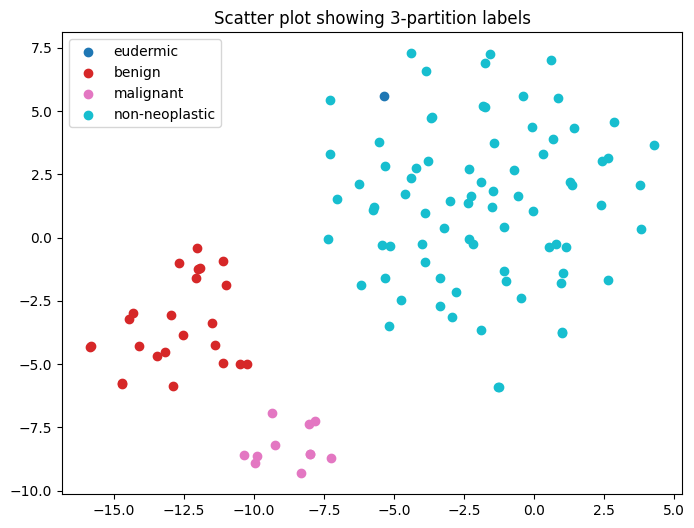

In [28]:
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(set(plot_labels)):
    class_indices = [index for index, value in enumerate(plot_labels) if value == class_name]
    class_data = Z[class_indices]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors(i), label=class_name)

plt.title('Scatter plot showing 3-partition labels')
plt.legend()
plt.show()

In [33]:
#code snippet to reduce the dimension of vector
import numpy as np

def normalize_l2(x):
    x = np.array(x)
    if x.ndim == 1:
        norm = np.linalg.norm(x)
        if norm == 0:
            return x
        return x / norm
    else:
        norm = np.linalg.norm(x, 2, axis=1, keepdims=True)
        return np.where(norm == 0, x, x / norm)



normalized_arrays = []

for array in res1_array:
    cut_dim = array[:768]
    #print(cut_dim.ndim)
    norm_dim = normalize_l2(cut_dim)
    normalized_arrays.append(norm_dim)

normalized_arrays = np.array(normalized_arrays)


print(normalized_arrays.shape)

(115, 768)


In [34]:
#Another way to reduce the dimension of vector
emb = []
for j in range(115):
    e = []
    for i in range(len(res1_array[j])//2):
        e.append((res1_array[j][2*i]+res1_array[j][2*i+1])/2)
    emb.append(e)
emb = np.array(emb, dtype=np.double)
np.shape(emb)

(115, 768)

In [ ]:
import torch
x = torch.cat(tuple([torch.tensor(emb).unsqueeze(0)]*32))
np.shape(x)
# or
x = np.concatenate(([normalized_arrays],)*32, axis=0)
np.save('text_embeddings_3_large_consecutive_averaged', x)